In [1]:
import os
os.chdir(r"C:\\python\\datamining\\tree_gain_ratio")
workingdir = os.path.join(os.getcwd(), '.')
os.chdir(os.path.join(workingdir, 'modules' )) 
os.getcwd()
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils

In [2]:
# 기본 tool #
import pandas as pd
import numpy as np
from IPython.display import Image
# entropy_gain을 구하기 위한 .py파일 # 총 4개(파일 4개가 연동되어있으니 수정은 삼가해주길 바람)
from usertree import userTree as utr
import utils
import matplotlib.pyplot as plt, seaborn as sb

In [3]:
## 데이터 확인 
    #A1:	0,1    CATEGORICAL
    #    a,b
    #A2:	continuous.
    #A3:	continuous.
    #A4:	1,2,3         CATEGORICAL
    #    p,g,gg
    #A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL
    #     ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x 
    #     
    #A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL
    #   ff,dd,j,bb,v,n,o,h,z 
    #
    #A7:	continuous.
    #A8:	1, 0       CATEGORICAL
    #    t, f.
    #A9: 1, 0	    CATEGORICAL
    #    t, f.
    #A10:	continuous.
    #A11:  1, 0	    CATEGORICAL
    #      t, f.
    #A12:    1, 2, 3    CATEGORICAL
    #        s, g, p 
    #A13:	continuous.
    #A14:	continuous.
    #A15:   1,2
    #       +,-         (class attribute)
    ## 각 feature 이름 안나타있음

In [4]:
# data 설정 #
data  = pd.read_csv(r'C:\\python\\datamining\\DM_dataset\\DM_dataset\\classification_data\\Australian Credit Approval\\australian.csv')

# y 기준 내림차순 정렬
data.sort_values(by="target", ascending=True, inplace=True)

# index 재설정
data = data.reset_index(drop=True)

# target data 이름 넣기 #
target_att = 'target'

X = data.loc[:, data.columns != target_att]
y = data.loc[:, data.columns == target_att]


from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# DT termination criteria #
## MAX_DEPTH: 기존 모델의 max_depth와 같음
## min_samples_leaf: 기존모델의 min_samples_leaf와 같음
# -> MAX_DEPTH는 변경불가 
MAX_DEPTH = 1000

sample_ratio = 0.02
min_sample_leaf = round(sample_ratio * len(X_train))

# data를 data frame형태로 train, test로 나눔
train_idx, test_idx = X_train.index, X_test.index
train, test = data.loc[train_idx,:], data.loc[test_idx,:]

In [6]:
# 이 부분 꼭 해주어야함 #
train = train.sort_index()
train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
2,1,18.58,5.710,2,2,4,0.540,0,0,0,0,2,120,1,0
3,1,32.75,2.335,2,2,8,5.750,0,0,0,1,2,292,1,0
4,1,20.00,11.045,2,8,4,2.000,0,0,0,1,2,136,1,0
5,0,33.92,1.585,1,1,1,0.000,1,0,0,0,2,320,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,24.50,12.750,2,8,5,4.750,1,1,2,0,2,73,445,1
684,0,50.08,12.540,2,6,4,2.290,1,1,3,1,2,156,1,1
685,1,21.83,0.250,2,2,8,0.665,1,0,0,1,2,0,1,1
687,1,21.33,10.500,2,8,4,3.000,1,0,0,1,2,0,1,1


In [7]:
#  실제 데이터의 class별 각 갯수 #
## original y의 class 수 ##

# data y의 이름을 넣으면 됌 #
uni_class = np.unique(data['target'])

class_number = {}
for i in uni_class:    
    class_number[i] = len(data[data['target'] == i])
    
class_number

{0: 383, 1: 307}

In [8]:
# 실제 train 데이터의 class별 각 갯수 #

# data의 y의 이름을 넣으면 됌 #
tra_uni_class = np.unique(train['target'])
tra_class_number = {}
for i in tra_uni_class:    
    tra_class_number[i] = len(train[train['target'] == i])
    
tra_class_number

{0: 307, 1: 245}

# gain ratio

In [9]:
CART_gini_ins = utr(min_sample_leaf, MAX_DEPTH, params ='entropy_GR', simplify=True)

In [10]:
# 모델 피팅 # 
## train: dataframe형태로 된 data
## target_attribute_name: target data로 설정된 y값 이름
gini_tree, gini_pprint_tree= CART_gini_ins.fit(train, target_attribute_name = "target")  

In [11]:
## CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
## CART_gini_graph_tree: tree 그래프를 생성하기 위한 값 저장 
CART_gini_tree, CART_gini_graph_tree = \
                CART_gini_ins.tree, CART_gini_ins.graph_tree   

In [12]:
## utils.get_usrt_info 코드 설명 ##
# train: data의 train data
# CART_gini_tree: tree에서 분리된 노드들의 분기기준과 data의 index, target(=class)가 출력 -> 성능측정용
# target_att: data의 y이름

utils.get_usrt_info(train ,CART_gini_tree, target_att = "target")

class prior: [0.5561594202898551, 0.4438405797101449]
leaf node별 class수: [242, 15]
leaf node별 class수: [0, 13]
leaf node별 class수: [5, 14]
leaf node별 class수: [23, 4]
leaf node별 class수: [6, 11]
leaf node별 class수: [9, 4]
leaf node별 class수: [4, 7]
leaf node별 class수: [8, 7]
leaf node별 class수: [9, 78]
leaf node별 class수: [1, 92]


,pred,depth,homogeneity,lift,coverage,number_of_variable
0,0,1,0.942,1.6938,0.466,1
1,1,2,0.989,2.2283,0.168,2
2,1,3,1.000,2.2531,0.024,3
3,1,5,0.737,1.6605,0.034,5
4,0,5,0.533,0.9584,0.027,5
5,1,5,0.897,2.0210,0.158,5


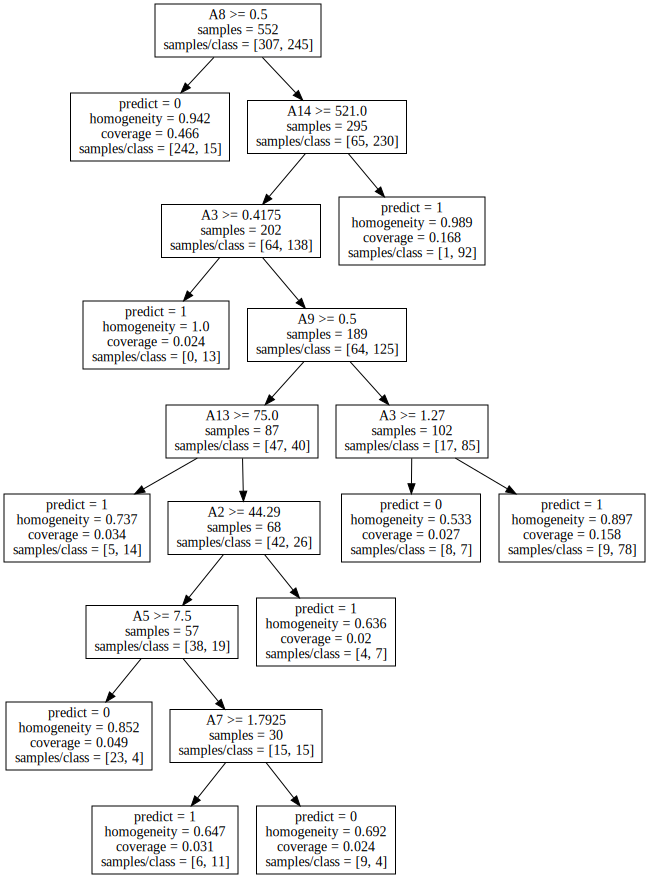

In [13]:
import graphviz
graph_dir = 'graph'
node, edge = CART_gini_ins.graph.tree_to_graph(CART_gini_graph_tree)
tree_graph = graphviz.Source(node + edge+'\n}')
tree_graph

# 유의사항: 왼쪽 화살표가 False, 오른쪽 화살표가 True임

In [14]:
# PDF 파일 출력 #
graph_dir = 'graph'
split = 'gain_ratio'
d_set_name = 'Australian Credit Approval'

tree_graph.render('{}/CART_{}_{}_test'.format(graph_dir, split,d_set_name))

'graph\\CART_gain_ratio_Australian Credit Approval_test.pdf'

In [15]:
# 성능측정 #
## train predict ##
train = data.loc[train_idx,:]

train_CART_gini_all_pred, train_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(train, CART_gini_tree)

## test predict ## 
test_CART_gini_all_pred, test_CART_gini_all_pred_prob \
    = CART_gini_ins.predict(test, CART_gini_tree)

In [16]:
# y의 name 넣기 
classes = np.unique(train['target'])
 
# train metric
train_CART_gini_all_met = utils.perform_check(train['target'], \
         train_CART_gini_all_pred, \
         train_CART_gini_all_pred_prob,\
         len(classes), CART_gini_ins.CLASS_DICT_)

# test metric
test_CART_gini_all_met = utils.perform_check(test['target'], \
         test_CART_gini_all_pred, \
         test_CART_gini_all_pred_prob, \
         len(classes), CART_gini_ins.CLASS_DICT_)

In [17]:
# [accuracy, recall, precision, f1, auc] 순
train_CART_gini_all_met

[0.9003623188405797,
 0.8775510204081632,
 0.8958333333333334,
 0.8865979381443299,
 0.9419530678721001]

In [18]:
# [accuracy, recall, precision, f1, auc] 순
test_CART_gini_all_met

[0.8260869565217391,
 0.7258064516129032,
 0.8653846153846154,
 0.7894736842105263,
 0.8864601018675722]

In [19]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(train_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.9, RECALL :0.878, PRECISION : 0.896, F1 : 0.887, AUC : 0.942


In [20]:
perform_base_str = '{} : ACCURACY :{}, RECALL :{}, PRECISION : {}, F1 : {}, AUC : {}'
print(perform_base_str.format('\nMetric\n ', \
            *np.round(np.array(test_CART_gini_all_met), 3)))


Metric
  : ACCURACY :0.826, RECALL :0.726, PRECISION : 0.865, F1 : 0.789, AUC : 0.886
